# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [6]:
# importing the needed libraries
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')

In [7]:
# downloading the first data set from a csv file
enhanced = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [8]:
# using the request library to programically download the image prediction
import requests
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)



In [4]:
# Saving the https content to file

with open("image-predictions.tsv", mode='wb') as file:
    file.write(response.content)

In [5]:
# reading the file into a data frame 
image=pd.read_csv('image-predictions.tsv',sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
# import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = enhanced.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [6]:
# reading the json file line by line into a data frame
tweets = pd.read_json('tweet-json.txt',lines = True)


In [7]:
# to get an overview of what is in the data and needed during this analysis
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [8]:
# getting the id, retweet and fvorite count only from the data set
tweet= tweets[["id","retweet_count", "favorite_count"]]

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



### The twitter enhanced data set: the data set contains 2354 rows and 17 columns which are 
•	tweet_id : identification number 
•	in_reply_to_status_id      
•	 in_reply_to_user_id        
•	 Timestamp: date the tweet was made                   
•	Source: url link                     
•	text : actual text of the tweet                       
•	retweeted_status_id: the retweet id number       
•	retweeted_status_user_id: retweet user id number  
•	 retweeted_status_timestamp: when the retweet occured
•	 expanded_urls :               
•	rating_numerator :            
•	 rating_denominator          
•	name : name of the dog                       
•	 doggo : dog stage                     
•	floofer  : dog stage                  
•	 pupper : dog stage                   
•	Puppo: dog stage

#### The image predictions data set: the data set contained 2075 row and 12 columns which are
•	tweet_id: tweet identification number
•	jpg_url: image link
•	img_num: the number of images since twitter allows 4 images
•	p1: the algorithm's #1 prediction for the image in the tweet      
•	p1_conf : how confident the algorithm is in its #1 prediction  
•	p1_dog : whether or not the #1 prediction is a breed of dog   
•	 p2: the algorithm's #2 prediction for the image in the tweet             
•	p2_conf : how confident the algorithm is in its #2 prediction    
•	p2_dog: whether or not the #2 prediction is a breed of dog       
•	 p3: the algorithm's #3 prediction for the image in the tweet         
•	 p3_conf : how confident the algorithm is in its #3 prediction   
•	p3_dog: whether or not the #1 prediction is a breed of dog 

#### The tweet json data set: the data contained 2354 columns and 3 rows which are

1.	id   : tweet identification number           
2.	retweet_count  : retweet count
3.	favorite_count  : favorite count
4.	Assessment issues:


In [9]:
# 1 DATA: the twitter-archive-enhanced table 
enhanced

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [10]:
# getting an overview of the data set
enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [11]:
# getting the mean and max count
enhanced.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# getting the value count for the names
enhanced.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
# printing out every single name in the column
name_list = enhanced.iloc[:,12]
for names in name_list:
    print(names)

Phineas
Tilly
Archie
Darla
Franklin
None
Jax
None
Zoey
Cassie
Koda
Bruno
None
Ted
Stuart
Oliver
Jim
Zeke
Ralphus
Canela
Gerald
Jeffrey
such
Canela
None
None
Maya
Mingus
Derek
Roscoe
None
Waffles
None
Jimbo
Maisey
None
Lilly
None
Earl
Lola
Kevin
None
None
Yogi
Noah
Bella
Grizzwald
None
Rusty
Gus
Stanley
Alfy
Koko
Rey
Gary
None
a
Elliot
Louis
None
Bella
Jesse
None
Romeo
None
Bailey
Duddles
Jack
Emmy
Steven
Beau
Snoopy
None
Shadow
Terrance
Shadow
Emmy
Aja
None
Penny
Dante
Nelly
Ginger
None
Benedict
Venti
Goose
Nugget
None
None
Cash
Coco
Jed
None
Sebastian
Walter
None
Sierra
Sierra
None
None
None
Monkey
None
Harry
Kody
Lassie
Rover
Napolean
Dawn
None
Boomer
None
None
Cody
Zoey
Rumble
Clifford
quite
Dewey
Stanley
Scout
Gizmo
Walter
Cooper
None
Cooper
None
Harold
Shikha
None
None
Jamesy
None
Lili
Jamesy
Coco
None
Boomer
Sammy
Nelly
None
Meatball
Paisley
Albus
Neptune
Quinn
Belle
None
None
Quinn
Zooey
Dave
Jersey
None
None
Hobbes
None
Burt
Lorenzo
None
Lorenzo
Carl
Jordy
None
None
Milky
Troop

In [14]:
# checking the reply status with value counts
enhanced.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64

In [15]:
# getting the sum of null values in reply status
sum(enhanced.in_reply_to_status_id.isnull())

2278

In [16]:
# getting the sum of null values in retweeted status
sum(enhanced.retweeted_status_id.isnull())

2175

In [17]:
# value count of duplicated values in reweet
enhanced.retweeted_status_id.duplicated().value_counts()

True     2174
False     182
Name: retweeted_status_id, dtype: int64

In [18]:
# checking for overview of the duplicated value in the table.
enhanced[enhanced.retweeted_status_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [19]:
# checking if any twwet is passed 2017-08-01
enhanced[enhanced.timestamp >= '2017-08-01']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [20]:
enhanced.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88], dtype=int64)

In [21]:
enhanced.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [22]:
enhanced[enhanced.rating_denominator >= 11].sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1662,682962037429899265,NaN,NaN,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1351,704054845121142784,NaN,NaN,2016-02-28 21:25:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/704054845...,60,50,a,None,None,None,None
1274,709198395643068416,NaN,NaN,2016-03-14 02:04:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/709198395...,45,50,None,None,None,None,None
1635,684222868335505415,NaN,NaN,2016-01-05 04:00:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Someone help the girl is being mugged. Several...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/684222868...,121,110,None,None,None,None,None
1779,677716515794329600,NaN,NaN,2015-12-18 05:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",IT'S PUPPERGEDDON. Total of 144/120 ...I think...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/677716515...,144,120,None,None,None,None,None
1634,684225744407494656,6.842229e+17,4.196984e+09,2016-01-05 04:11:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/684225744...,143,130,None,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [23]:
# 2 DATA: image data set containing images of dogs and confidence levle
image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [24]:
# the numbers of row and column the data contain
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
# overview of the data with it max and mean number
image.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [26]:
# value count in p1_dog if the image is dog or not
image.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [27]:
# duplicated values fir the image link
sum(image.jpg_url.duplicated())


66

In [28]:
# sum of duplicated values in the image data
sum(image.duplicated())

0

In [29]:
# 3 DATA: the tweet table data
tweet

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [30]:
#  number of row and column and data types
tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   id              2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [31]:
# overview of the number of tweets maximum and minimum count
tweet.describe()

,id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


In [32]:
# to get the columes name that are common in the three data set which can be used as primary key for merging
all_columns = pd.Series(list(enhanced) + list(tweet) + list(image))
all_columns[all_columns.duplicated()]

20    tweet_id
dtype: object

### Assesment issues
###### `enhanced` table
1. the  "retweeted_status_id,in_reply_to_status_id" column have lot of null values

2. not all column are needed for this analysis which needs to be droped

3. the data type for some of the column are incorrect

4. the doggo,floofer,pupper,and puppo should be a single column and a category type of data  

5.  the rating_ columns should be a single column

6. the name column has lot of unfidined values


###### `image prediction` table

6. some images and false and are not dogs

7. the url has duplicated links

###### `tweet` table

8. the id column name needs changing for easy merging

### Quality issues
###### `enhanced` table
1. Droping the rows in "retweeted_status_id,in_reply_to_status_id" column where it has a value other than 'Null" to get only real tweets

2. Droping columns that are empty 

3. timestamp to datetime

4. text to string

5. doggo,floofer,pupper,and puppo to categories

6. creating a single column for the dog stages

7. joining the rating_ columns into one with an "/" symbol

8. changing the undefined name and None to nan


###### `image prediction` table

9. removing all all columns where p1_dog,p2_dog and p3_dog is false


###### `tweet` table

10. changing the id column name to tweet_id

### Tidiness issues
1. extracting only column that are true with the highest confidence level from all the dog prediction with their breed into a single column

2. merge all tables into a master table


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [33]:
# Make copies of original pieces of data
enhanced_clean = enhanced.copy()
image_clean = image.copy()
tweet_clean = tweet.copy()


### Issue #1: Droping the rows in  "retweeted_status_id,in_reply_to_status_id" column where it has a value other than 'Null" 

In [34]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

   #### Define: 
   to get only the tweets and not retweets

#### Code

In [35]:
values=enhanced_clean.retweeted_status_id[enhanced_clean.retweeted_status_id.notnull()]
values_2=enhanced_clean.in_reply_to_status_id[enhanced_clean.in_reply_to_status_id.notnull()]

In [36]:
enhanced_clean = enhanced_clean[enhanced_clean['retweeted_status_id'].isin(values) == False]


In [37]:
enhanced_clean = enhanced_clean[enhanced_clean['in_reply_to_status_id'].isin(values_2) == False]

#### Test

In [38]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

### Issue #2: Droping columns that are empty  


#### Define
droping in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls

#### Code

In [39]:
enhanced_clean.drop(enhanced_clean.columns[[1,2,6,7,8,9,]], axis = 1, inplace = True)

#### Test

In [40]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2097 non-null   int64 
 1   timestamp           2097 non-null   object
 2   source              2097 non-null   object
 3   text                2097 non-null   object
 4   rating_numerator    2097 non-null   int64 
 5   rating_denominator  2097 non-null   int64 
 6   name                2097 non-null   object
 7   doggo               2097 non-null   object
 8   floofer             2097 non-null   object
 9   pupper              2097 non-null   object
 10  puppo               2097 non-null   object
dtypes: int64(3), object(8)
memory usage: 196.6+ KB


### Issue #3,4,5: Changing data types 


#### Define 
* timestamp to datetime
* text to string
* doggo,floofer,pupper,and puppo to categories

#### Code

In [41]:
# converting doggo,floofer,pupper,and puppo to categories
enhanced_clean[['doggo','floofer','pupper','puppo']]=enhanced_clean[['doggo','floofer','pupper','puppo']].apply(lambda x: x.astype('category'))

In [42]:
# convert timestamp to date.
enhanced_clean['timestamp'] = enhanced_clean['timestamp'].apply(pd.to_datetime, errors='coerce')
enhanced_clean['text'] = enhanced_clean['text'].astype(object)


#### Test

In [43]:
enhanced_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   doggo               2097 non-null   category           
 8   floofer             2097 non-null   category           
 9   pupper              2097 non-null   category           
 10  puppo               2097 non-null   category           
dtypes: category(4), datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 139.7+ KB


### Issue #6: creating a single column for the dog stages  


#### Define 
* replace all None values to empty 
* join the column together into dog_stages
* drop the doggo,floofer,pupper,and puppo column

#### Code

In [44]:
# replacing all none values with empty data
enhanced_clean['doggo']=enhanced_clean['doggo'].replace(['None'], '')
enhanced_clean['floofer']=enhanced_clean['floofer'].replace(['None'], '')
enhanced_clean['pupper']=enhanced_clean['pupper'].replace(['None'], '')
enhanced_clean['puppo']=enhanced_clean['puppo'].replace(['None'], '')

In [45]:
#joining data together into a column
enhanced_clean['dog_stage']= enhanced_clean[['doggo', 'floofer', 'pupper','puppo']].agg('.'.join, axis=1)

In [46]:
# viewing the column 
enhanced_clean.dog_stage.value_counts()

...                1761
..pupper.           221
doggo...             72
...puppo             23
.floofer..            9
doggo..pupper.        9
doggo...puppo         1
doggo.floofer..       1
Name: dog_stage, dtype: int64

In [47]:
# renameing the column for better representation
enhanced_clean['dog_stage']=enhanced_clean['dog_stage'].replace({'...':'None','..pupper.':'pupper','doggo...':'doggo','...puppo':'puppo','.floofer..':'floofer','doggo..pupper.':'doggo-pupper','doggo...puppo':'doggo-puppo','doggo.floofer..':'doggo-floofer'})

In [48]:
# droping the former columns
enhanced_clean=enhanced_clean.drop(enhanced_clean.iloc[:,7:11], axis = 1)

#### Test

In [49]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2097 non-null   int64              
 1   timestamp           2097 non-null   datetime64[ns, UTC]
 2   source              2097 non-null   object             
 3   text                2097 non-null   object             
 4   rating_numerator    2097 non-null   int64              
 5   rating_denominator  2097 non-null   int64              
 6   name                2097 non-null   object             
 7   dog_stage           2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(4)
memory usage: 147.4+ KB


### Issue #7: Joining the ratings_ columns into one

### Define: 
* join the two columns together with "/"
* drop the old columns

### Code

In [50]:
# joining the two column into rating 
enhanced_clean['rating']= enhanced_clean['rating_numerator'].apply(str)  + '/' + enhanced_clean['rating_denominator'].apply(str) 

In [51]:
# droping the rating_ columns
enhanced_clean.drop(['rating_numerator', 'rating_denominator'], axis=1, inplace=True)

### Test

In [52]:
#getting value count for first 10 
enhanced_clean.rating.value_counts()[:10]

12/10    486
10/10    436
11/10    413
13/10    287
9/10     152
8/10      98
7/10      51
14/10     38
5/10      34
6/10      32
Name: rating, dtype: int64

In [53]:
enhanced_clean.sample(10)

,tweet_id,timestamp,source,text,name,dog_stage,rating
810,771380798096281600,2016-09-01 16:14:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fizz. She thinks love is a social constru...,Fizz,None,11/10
1591,686606069955735556,2016-01-11 17:50:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Horace. He was practicing his levitation,...",Horace,None,10/10
412,822975315408461824,2017-01-22 01:12:59+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Albus. He's soaked as h*ck. Seems to h...,Albus,None,12/10
500,813112105746448384,2016-12-25 20:00:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Toby. He's pupset because his hat isn't b...,Toby,None,12/10
954,751793661361422336,2016-07-09 15:02:31+00:00,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is Fred. He's having one heck of a summer...,Fred,None,11/10
2071,671115716440031232,2015-11-29 23:57:10+00:00,"<a href=""http://twitter.com/download/iphone"" r...","Meet Phred. He isn't steering, looking at the ...",Phred,None,6/10
696,786664955043049472,2016-10-13 20:28:35+00:00,"<a href=""http://twitter.com/download/iphone"" r...","""Honestly Kathleen I just want more Ken Bone"" ...",None,None,12/10
1316,706644897839910912,2016-03-07 00:57:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Shadow. She's tired of the responsibiliti...,Shadow,None,9/10
1563,688179443353796608,2016-01-16 02:02:19+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lizzie. She's about to fist bump the l...,Lizzie,pupper,10/10
270,841314665196081154,2017-03-13 15:47:01+00:00,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Max. There's no way in h*ck you're tak...,Max,None,13/10


### Quality Issue #8 : Changing the undefined name and None to nan

### Define
* replacing all undifined row to nan

### Code

In [54]:
# writing out all the words which are not defined
undefined= (["a","an","the","all","his","my","old","this","just","None","o","one","very","by"])
# using a function to replace all the names with nan
for words in undefined:
    enhanced_clean.replace(words,np.nan,inplace=True)

In [55]:
enhanced_clean.name.value_counts()

Charlie       11
Lucy          11
Cooper        10
Oliver        10
Penny          9
              ..
Sephie         1
Bonaparte      1
Wishes         1
Rose           1
Christoper     1
Name: name, Length: 942, dtype: int64

### Quality Issue #9 : Removing all all columns where p1_dog,p2_dog and p3_dog is false

### Tidiness issues #1: extracting only column that are true with the highest confidence level from all the dog prediction with their breed into a single column

### Define
* droping column where all dog image are false in the 3 data set. for quality issue
* create column where confidence level first prediction is chosen if it  is true, if not query the next prediction. and the breed of the dog column are also created into a single column.
* the 'p' columns are droped.
* [code got here for droping all false columns](https://stackoverflow.com/questions/63862272/drop-boolean-rows-from-dataframe) 
* [ the nump.select fuction source was from here](https://towardsdatascience.com/creating-conditional-columns-on-pandas-with-numpy-select-and-where-methods-8ee6e2dbd5d5)

### Code

In [56]:
# removing all all columns where p1_dog,p2_dog and p3_dog is false
image_clean = image_clean[image_clean[['p1_dog','p2_dog','p3_dog']].sum(1).ne(0)].copy()

In [57]:
# creating a numpy array where only p_dog columns are picked if the values is true.if the p1_dog is not true it choose the next value
conditions=[(image_clean['p1_dog'] == True),
            (image_clean['p2_dog'] == True),
            (image_clean['p3_dog'] == True)]

# here creating another numpy array where the confidence level of what ever column is true will be picked from e.g if p2_dog is true it pickes the confidence level 
confidence_level=[(image_clean['p1_conf']),
                  (image_clean['p2_conf']),
                  (image_clean['p3_conf'])]

# here the np.select statement is used to create a column from the data frame where all the conditions are met.
image_clean['confidence_point']= np.select(conditions,confidence_level,default=0)

In [58]:
# here another column is created for the breed of the animal if the condition of the p_dog column is true.
breed=[(image_clean['p1']),
       (image_clean['p2']),
       (image_clean['p3'])]

# here the np.select statement is used to create a column for the dog breed out of the p_dog column from the data frame where all the conditions are met.
image_clean['breed_name']= np.select(conditions,breed,default='none')

### Test

In [59]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   p1                1751 non-null   object 
 4   p1_conf           1751 non-null   float64
 5   p1_dog            1751 non-null   bool   
 6   p2                1751 non-null   object 
 7   p2_conf           1751 non-null   float64
 8   p2_dog            1751 non-null   bool   
 9   p3                1751 non-null   object 
 10  p3_conf           1751 non-null   float64
 11  p3_dog            1751 non-null   bool   
 12  confidence_point  1751 non-null   float64
 13  breed_name        1751 non-null   object 
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 169.3+ KB


In [60]:
# droping all p columns 
image_clean=image_clean.drop(image_clean.iloc[:,3:12], axis = 1)

### Test

In [61]:
# Checking if the code is correct
image_clean.sample(10)

,tweet_id,jpg_url,img_num,confidence_point,breed_name
441,674468880899788800,https://pbs.twimg.com/media/CVwx3dQXAAA0ksL.jpg,2,0.526230,chow
1866,843604394117681152,https://pbs.twimg.com/media/C7UVuE_U0AI8GGl.jpg,1,0.430583,Labrador_retriever
1699,816829038950027264,https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg,1,0.245773,golden_retriever
1147,730924654643314689,https://pbs.twimg.com/media/CiTEFjDXAAAqU6I.jpg,1,0.086241,Newfoundland
1822,834786237630337024,https://pbs.twimg.com/media/C5XBp19WYAA5a_v.jpg,1,0.156276,Border_terrier
1893,849412302885593088,https://pbs.twimg.com/media/C8m3-iQVoAAETnF.jpg,4,0.907559,schipperke
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,0.146311,pug
1404,769695466921623552,https://pbs.twimg.com/media/Cq6B8V6XYAA1T1R.jpg,1,0.407117,pug
1613,801958328846974976,https://pbs.twimg.com/media/CyEg2AXUsAA1Qpf.jpg,1,0.327887,Staffordshire_bullterrier
1950,863079547188785154,https://pbs.twimg.com/media/C_pGRInUwAAmTY_.jpg,1,0.275242,Lakeland_terrier


### Issue #10: changing the id column name to tweet_id

### Define: 
rename id column

### Code

In [62]:
# replacing the column name
tweet_clean.rename(columns={'id': 'tweet_id'}, inplace=True)

### Test

In [63]:
# 5 samples
tweet_clean.sample(5)

,tweet_id,retweet_count,favorite_count
29,886267009285017600,4,117
1944,673705679337693185,439,1337
2164,669363888236994561,252,669
443,819238181065359361,462,2550
1441,696744641916489729,1069,2293


### Tidiness issues #2: extracting only column that are true with the highest confidence level from all the dog prediction with their breed into a single column

### Define
* check all column length
* merge them together into a table
* droping empty row

### Code

In [64]:
image_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1751 non-null   int64  
 1   jpg_url           1751 non-null   object 
 2   img_num           1751 non-null   int64  
 3   confidence_point  1751 non-null   float64
 4   breed_name        1751 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 82.1+ KB


In [65]:
tweet_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


In [66]:
enhanced_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype              
---  ------     --------------  -----              
 0   tweet_id   2097 non-null   int64              
 1   timestamp  2097 non-null   datetime64[ns, UTC]
 2   source     2097 non-null   object             
 3   text       2097 non-null   object             
 4   name       1408 non-null   object             
 5   dog_stage  336 non-null    object             
 6   rating     2097 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(1), object(5)
memory usage: 131.1+ KB


In [67]:
# first using the merge fuction to join the tweet to enhanced table 
enhanced_clean_2=pd.merge(enhanced_clean,tweet_clean, on='tweet_id', how='left')

In [79]:
# using merge to also join the image data to the master data set dog_table
dog_table=pd.merge(enhanced_clean_2,image_clean, on='tweet_id', how='inner')

### Test

In [80]:
dog_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   int64              
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   object             
 3   text              1666 non-null   object             
 4   name              1198 non-null   object             
 5   dog_stage         257 non-null    object             
 6   rating            1666 non-null   object             
 7   retweet_count     1666 non-null   int64              
 8   favorite_count    1666 non-null   int64              
 9   jpg_url           1666 non-null   object             
 10  img_num           1666 non-null   int64              
 11  confidence_point  1666 non-null   float64            
 12  breed_name        1666 non-null   object             
dtypes: 

### Test

In [83]:
dog_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1666 entries, 0 to 1665
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          1666 non-null   int64              
 1   timestamp         1666 non-null   datetime64[ns, UTC]
 2   source            1666 non-null   object             
 3   text              1666 non-null   object             
 4   name              1198 non-null   object             
 5   dog_stage         257 non-null    object             
 6   rating            1666 non-null   object             
 7   retweet_count     1666 non-null   int64              
 8   favorite_count    1666 non-null   int64              
 9   jpg_url           1666 non-null   object             
 10  img_num           1666 non-null   int64              
 11  confidence_point  1666 non-null   float64            
 12  breed_name        1666 non-null   object             
dtypes: 

In [84]:
dog_table.sample(10)

,tweet_id,timestamp,source,text,name,dog_stage,rating,retweet_count,favorite_count,jpg_url,img_num,confidence_point,breed_name
1146,683481228088049664,2016-01-03 02:53:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Banjo. He's a Peppercorn Shoop Da Whoop. ...,Banjo,pupper,11/10,1118,2878,https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg,1,0.508951,keeshond
1605,667211855547486208,2015-11-19 05:24:37+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Genevieve. She is a golden retriever c...,Genevieve,NaN,9/10,258,516,https://pbs.twimg.com/media/CUJppKJWoAA75NP.jpg,1,0.462556,golden_retriever
961,700029284593901568,2016-02-17 18:49:22+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Coops. His ship is taking on water. So...,Coops,NaN,10/10,661,2262,https://pbs.twimg.com/media/CbcA673XIAAsytQ.jpg,1,0.726571,West_Highland_white_terrier
1660,666050758794694657,2015-11-16 00:30:50+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is a truly beautiful English Wilson Staff...,NaN,NaN,10/10,60,136,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,0.651137,Bernese_mountain_dog
1215,679111216690831360,2015-12-22 01:28:25+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,officially,NaN,12/10,2893,6514,https://pbs.twimg.com/ext_tw_video_thumb/67911...,1,0.189423,kelpie
1177,681261549936340994,2015-12-27 23:53:05+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Panda. He's a Quackadilly Shooste...,Panda,NaN,9/10,308,1597,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,0.382101,Tibetan_terrier
1167,681891461017812993,2015-12-29 17:36:07+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Charlie. He's scholarly af. Quite...,Charlie,pupper,10/10,951,2706,https://pbs.twimg.com/media/CXaQqGbWMAAKEgN.jpg,1,0.203570,Chihuahua
945,701952816642965504,2016-02-23 02:12:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Rilo. He's a Northern Curly Ticonderoga. ...,Rilo,NaN,11/10,1149,4167,https://pbs.twimg.com/media/Cb3WXMUUMAIuzL8.jpg,1,0.331707,toy_poodle
448,787322443945877504,2016-10-15 16:01:13+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Lincoln. He forgot to use his blinker ...,Lincoln,NaN,10/10,2032,8726,https://pbs.twimg.com/media/Cu0hlfwWYAEdnXO.jpg,1,0.105703,golden_retriever
899,707038192327901184,2016-03-08 03:00:15+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Kathmandu. He sees every move you make...,Kathmandu,NaN,10/10,900,2404,https://pbs.twimg.com/media/Cc_ney1W4AANuY3.jpg,1,0.642426,pug


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [85]:
dog_table.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

##### the data set is a joint table of three diffrent data set after cleaning and merging was done.
##### the columns in the final data set includes:

* tweet_id: tweet identification number

* timestamp: Day the tweet was made 

* Source: the tweet link

* Text: the text written in the tweet

* Name: dogs name

* Dog stage: the stage of the dog like age range

* Rating: the ratting of the dogs NOTE: the numerator are bigger than the denominator 

* Retweet_count: numbers of retweet

* Favorite_count: numbers of likes
 
* jpg_url:the link to the tweet images

* img_num:the image number 1-4

* confidence_point:the confidence level of the image after running it through a neural network
 
* Breed_name: the dog breeds with the highest confidence point after extracting it from 3 diffrent predictions
 
 

## 1: What do the row that  have  the highest retweet and favorite count have in common ?

In [86]:
# getting top 5 largest rows with retweet and favorite counts
largest_retweet= dog_table.nlargest(5,'retweet_count')
largest_favorite= dog_table.nlargest(5,'favorite_count')
# merging the columns to find the most common row amonst the highest count
common_row = largest_favorite.merge(largest_retweet, how = 'inner' ,indicator=False)
common_row

,tweet_id,timestamp,source,text,name,dog_stage,rating,retweet_count,favorite_count,jpg_url,img_num,confidence_point,breed_name
0,822872901745569793,2017-01-21 18:26:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a super supportive puppo participating ...,NaN,puppo,13/10,48265,132810,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1,0.196015,Lakeland_terrier
1,744234799360020481,2016-06-18 18:26:18+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,doggo,13/10,79515,131075,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,0.825333,Labrador_retriever
2,879415818425184262,2017-06-26 19:07:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Duddles. He did an attempt. 13/10 some...,Duddles,NaN,13/10,45849,107956,https://pbs.twimg.com/ext_tw_video_thumb/87941...,1,0.383404,English_springer
3,807106840509214720,2016-12-09 06:17:20+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Stephan. He just wants to help. 13/10 ...,Stephan,NaN,13/10,56625,107015,https://pbs.twimg.com/ext_tw_video_thumb/80710...,1,0.505370,Chihuahua


* They have four rows in common

* They all have their ratings as 13/10

* all contain the first image

## 2: What are the top 10 dog names which are common ?

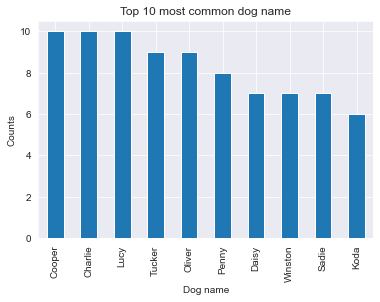

In [87]:
# getting the top 10 dog names that are common
highest_name_count=dog_table.name.value_counts()[:10]
# plotting a bar chart
highest_name_count.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Dog name')
# displaying the title
plt.title("Top 10 most common dog name");

* Copper,Charlie,Lucky are the most common dog name in the data set

## 3: What is the highest  dog stage ?

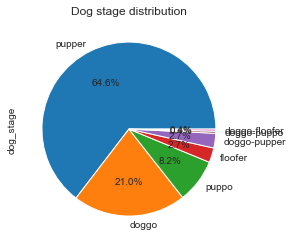

In [90]:
# plotting pie chart for dog stage distribution
dog_table.dog_stage.value_counts().plot(kind='pie',autopct='%1.1f%%')
print()

# displaying the title
plt.title("Dog stage distribution");

* Pupper is the most common dog breed followed by doggo and the least are the dogs that have two stages

## What is the top 10 most common dog name ?

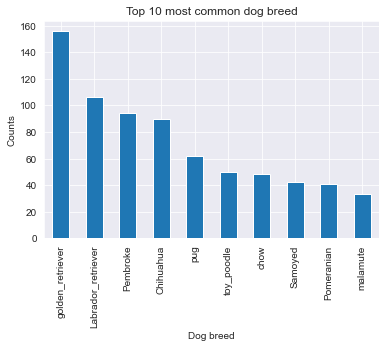

In [89]:
# pulling out only the top 10 most common dogs
highest_dog=dog_table.breed_name.value_counts()[:10]
# ploting a bar chat
highest_dog.plot(kind='bar')
plt.ylabel('Counts')
plt.xlabel('Dog breed')
# displaying the title
plt.title("Top 10 most common dog breed");

* The golden_retriever is the most common dog name and this was gotten after extracting the dog image with the highest prediction.